In [1]:
### Emma Beyer & Desa Bolger
### emma.beyer@duke.edu & desa.bolger#duke.edu

#The goal of this document is to explore the relation of wrecks in NC and years

#Read in packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
#Read Wrecks in NC Federal Waters into a Pandas dataframe
NC_Wrecks = gpd.read_file('../Data/Processed/ONLYncWRECKS.shp')
NC_Wrecks.head()

,Join_Count,TARGET_FID,FID_Wrecks,positionqu,objectname,objectcate,yearsunk,comment,datasource,sourcereco,...,NEAR_DIST,UIDENT,DEPTH,RANGE,EDIT,EDIT_DATE,Shape_Le_1,Shape__Are,Shape__Len,geometry
0,1,1,0,Low,HERCULES,wreck,0.0,"00470 01 DATED 1923 24 NO.8824 - SCHOONER, 163...",AWOIS,AWOIS,...,0.0,12109,3,501-2500 metres in depth,NEW,20060000,1.116557e+08,4.352814e+12,1.116557e+08,POINT (-79.5831 30.71691)
1,1,2,0,Low,ESSO GETTYSBURG,wreck,0.0,"00478 24 NO.1162 - TANKER, 10172 GT - SUNK 6/1...",AWOIS,AWOIS,...,0.0,12109,3,501-2500 metres in depth,NEW,20060000,1.116557e+08,4.352814e+12,1.116557e+08,POINT (-79.24976 31.00024)
2,1,3,0,Low,DAISY FORLIN,wreck,0.0,"00479 01 1920 24 NO.8804 - 466 GT, SUNK 11/18/...",AWOIS,AWOIS,...,0.0,289909,1,0-200 metres in depth,NEW,20060000,3.649745e+08,6.383595e+12,3.649745e+08,POINT (-80.16646 31.00024)
3,1,4,0,None,None,wreck,0.0,None,US4GA11M.000,ENCAWPT,...,0.0,289909,1,0-200 metres in depth,NEW,20060000,3.649745e+08,6.383595e+12,3.649745e+08,POINT (-80.96661 31.31684)
4,1,5,0,Low,None,wreck,0.0,"NM41/47(5360) WK OF A TUG, WILL BE MARKED WITH...",AWOIS,AWOIS,...,0.0,289909,1,0-200 metres in depth,NEW,20060000,3.649745e+08,6.383595e+12,3.649745e+08,POINT (-80.96648 31.3169)


In [3]:
#Summary data on the years of Interstate Wreaks
NC_Wrecks['yearsunk'].describe()

count    3464.000000
mean       14.681582
std       168.873036
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2009.000000
Name: yearsunk, dtype: float64

In [4]:
#Remove all the zero values and create a new DataFrame
NC_Wrecks_nozeros = NC_Wrecks[NC_Wrecks['yearsunk'] != 0]

#Report summary data of wreck years
NC_Wrecks_nozeros['yearsunk'].describe()

count      26.000000
mean     1956.038462
std        32.619602
min      1892.000000
25%      1927.000000
50%      1968.000000
75%      1974.500000
max      2009.000000
Name: yearsunk, dtype: float64

In [5]:
#Convert the year values to integers
NC_Wrecks_nozeros['yearsunk'] = NC_Wrecks_nozeros['yearsunk'].astype(int)

#Verify the changes
NC_Wrecks_nozeros['yearsunk'].head()

C:\Users\ekb41\AppData\Local\ESRI\conda\envs\gis\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


103     1980
203     1996
624     1923
640     1923
1087    1975
Name: yearsunk, dtype: int32

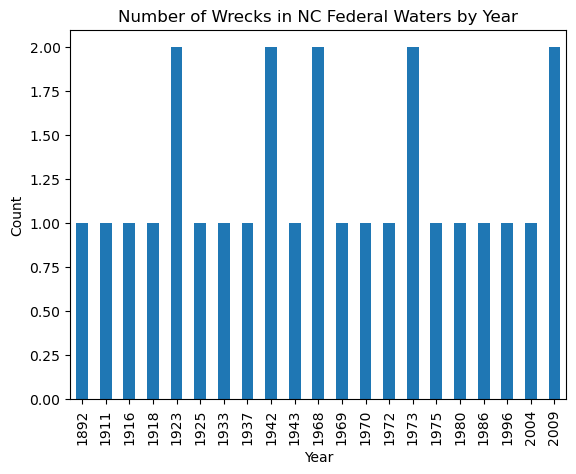

In [6]:
#Change years into count values
wreck_counts = NC_Wrecks_nozeros['yearsunk'].value_counts().sort_index()

#Plot number of wrecks by year
wreck_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Wrecks in NC Federal Waters by Year')

#Save plot png
plt.savefig('../Products/NC_Wrecks_Years_Table.png', dpi=300)

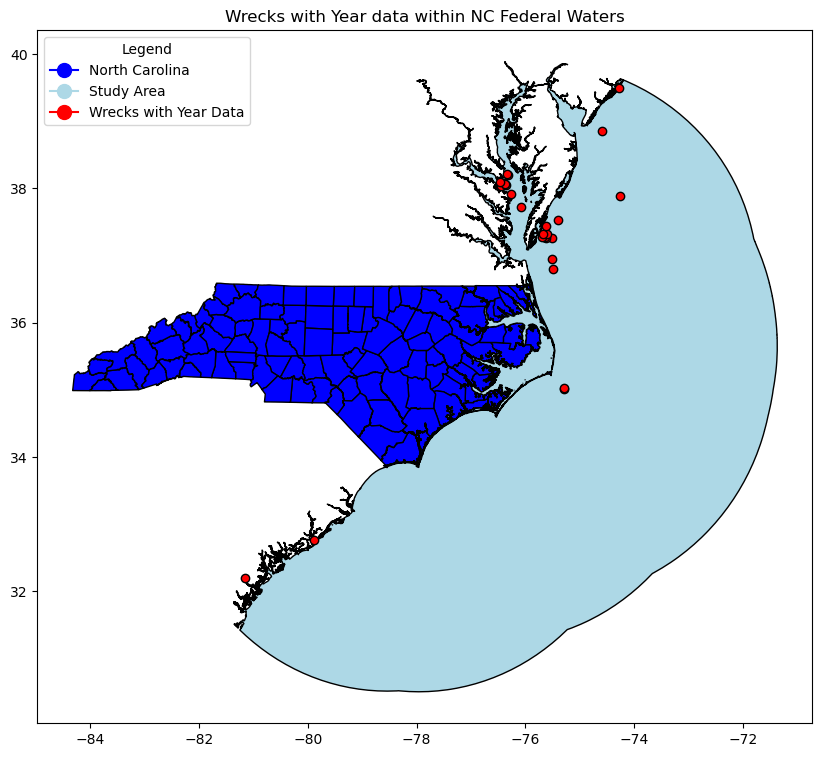

In [8]:
#Read in NC Federal Waters polygon into a Pandas dataframe
NC_EEZ = gpd.read_file('../Data/Processed/NCBuffer.shp')

#Read in NC counties into a Pandas dataframe
NC = gpd.read_file('../Data/Processed/NC_wgs1984.shp')

#Plot of EEZ
ax = NC.plot(color='blue', edgecolor='black', figsize=(10, 10))

#Plot of NC
NC_EEZ.plot(ax=ax, color='lightblue', edgecolor='black')

#Plot of NC Wrecks with year data
NC_Wrecks_nozeros.plot(ax=ax, color='red', edgecolor='black')
plt.title('Wrecks with Year data within NC Federal Waters')

# Create custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='blue', label='North Carolina', markersize=10),
    plt.Line2D([0], [0], marker='o', color='lightblue', label='Study Area', markersize=10),
    plt.Line2D([0], [0], marker='o', color='red', label='Wrecks with Year Data', markersize=10)
]

# Adding the legend
ax.legend(handles=handles, loc='upper left', title='Legend')

#Save plot to png
plt.savefig('../Products/NC_Wrecks_Years_Plot.png', dpi=300)